In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
%matplotlib inline

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The Dataset contains 9994 rows of records and 13 columns of attributes. The data type of attributes consist of 8 qualitative discrete categorical, 2 quantitative discrete numerical integer and 3 quantitative continuous numerical float with 64 digit placings

In [5]:
# display unique categories for qualitatice attributes 
categorical_features = [i for i in df.columns if df.dtypes[i] == 'object']
for j in categorical_features:
    print(j)
    print(sorted(df[j].unique()))

Ship Mode
['First Class', 'Same Day', 'Second Class', 'Standard Class']
Segment
['Consumer', 'Corporate', 'Home Office']
Country
['United States']
City
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream'

Through this we found that there are no noises of impossible values or errors of inconsistent values

In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df[df.duplicated(subset = None,keep = False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [8]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [10]:
df = pd.DataFrame.drop_duplicates(df)

In [11]:
df.shape

(9977, 13)

In [12]:
df=df.drop(['Country','Postal Code'],axis = 1)

In [13]:
df.shape

(9977, 11)

<AxesSubplot:>

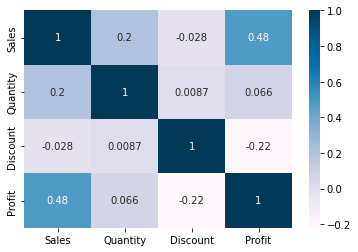

In [14]:
sns.heatmap(df.corr(),cmap = 'PuBu',annot=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


In [16]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [17]:
round(sum(df['Sales']),2)

2296195.59

In [18]:
sum(df['Quantity'])

37820

In [19]:
round(sum(df['Profit']),2)

286241.42

>Total sales value was USD\\$2296195.59 and USD\\$230.15 on average for each transaction. This can range from USD\\$0.44 to a highest sales value of USD\\$22,638.48 for an individual transaction. The Higher amounts were likely placed by corporate or Home Office customer segments for larger quantities of products.

> Total quantity sold was 37,820 and 4 on average for each transaction.The higher quantities were likely placed by Corporate or Home Office customer segments

> Average discount was 16% for each transaction. This can range from no discount to highest discount of 80% for individual transaction.The higher discounts were likely from festivas, end-of-season sales, ad clearance sales for Older stocks.

> Overall,the Superstore made good profit of USD\\$286241.42, and on a averae profit of USD\\$28.69 per transaction. However, this can range from loss of USD\\$6,599.98 to a highest profit of USD\\$8,399.98 for an individual transaction.Higher discounts likely played a major role in the more significant losses.

c:\users\durgesh patil\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\durgesh patil\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


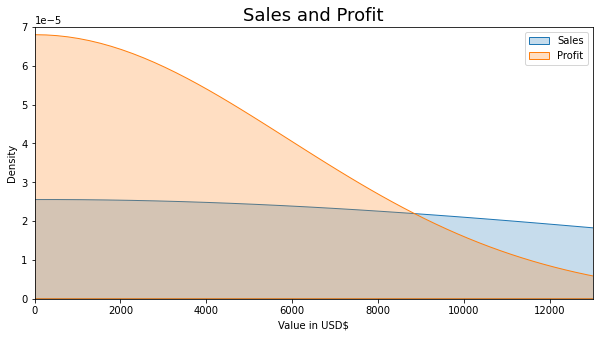

In [20]:
plt.figure(figsize= (10,5))

sns.kdeplot(df['Sales'],label='Sales',shade=True ,bw = 25)
sns.kdeplot(df['Profit'],label = 'Profit',shade = True, bw = 25)

plt.xlim([0,13000])
plt.ylim([0,0.00007])
plt.ylabel("Density")
plt.xlabel("Value in USD$")

plt.title('Sales and Profit', fontsize = 18)
plt.legend()

plt.show()

c:\users\durgesh patil\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\durgesh patil\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


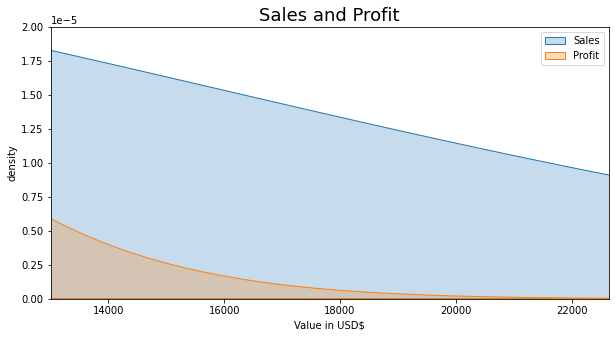

In [21]:
plt.figure(figsize = (10,5))

sns.kdeplot(df['Sales'],label="Sales",shade = True,bw = 25)
sns.kdeplot(df['Profit'],label="Profit",shade = True,bw=25)

plt.xlim([13000,22640])
plt.ylim([0,0.00002])

plt.xlabel("Value in USD$")
plt.ylabel("density")

plt.title("Sales and Profit",fontsize = 18)
plt.legend()

plt.show()

> Profits are mostly above sales, indicating good business.However, there are some instances where profits can be improved,such as at USD\\$9,000 sales mark onwards.

> The histogram density plots highest points in the curves show the pattern of more sales transactions with less than USD$1k monetary value,and the highest profit is gained when the value is less than USD\\$500

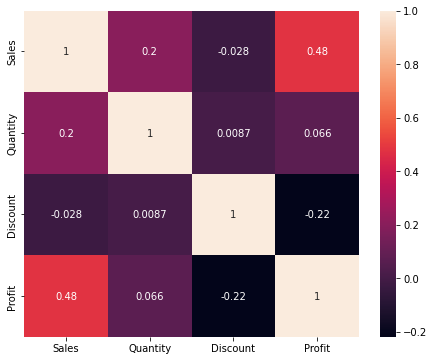

In [22]:
plt.figure(figsize = (7.5,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

> Sales and profit have a moderate positive linear correlation. When Sales increase by USD\\$1, Profit will increase by USD\\$0.48. This is indicative that this Superstore is a popular company with constant demand of the products sold, and the management may have a good ability in managing costs to ensure high profit margins.

> Discount and Profit have a weak negative linear correlation. When Discount increase by 1%, Profit will decrease by USD\\$0.22. This is because discount deductions will reduce overall sales revenues.

> Quantity and Profit have little to no linear correlation. This is indicative thath the Superstore may sell a considerable number of products at low profit margins, with promotional strategies such as higher discounts on larger quantities of products in a single transaction, and Buy One Get One Free (BOGOF) promotions. As a result, average profit is lower. Another likely explation is that Profit will increase as Quantity increases, but not on a linear scale.

> Discount and Sales have little to no linear correlation. This is indicative that despite targeting to implement discounts as a promotional strategy to successfully increase sales, Superstore encouraged bad consumer psycology instead 